## MODEL TRAINING

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score, roc_curve
import datetime
import joblib
import tensorflow as tf

In [2]:
### Train-Test data
X_train = pd.read_csv('../../dataset/split/X_train.csv', index_col=0)
X_test = pd.read_csv('../../dataset/split/X_test.csv', index_col=0)
y_train = pd.read_csv('../../dataset/split/y_train.csv', index_col=0)
y_test = pd.read_csv('../../dataset/split/y_test.csv', index_col=0)

In [3]:
### Model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

/home/marcusholloway/Documents/Github_repos/Customer_churn_pred/venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
E0000 00:00:1749310278.539891   23198 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1749310278.587312   23198 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [4]:
### defining loss functions and optimizers
optimizer = Adam(learning_rate=1e-2)
loss = BinaryCrossentropy()

In [5]:
### Callbacks
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
early_stopping_cb = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
tensorboard_cb = TensorBoard(log_dir=log_dir, histogram_freq=1)

In [6]:
### compile the model
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy', 'precision'])

In [7]:
### Train the model
history = model.fit(
    X_train,
    y_train,
    validation_split=0.1,
    epochs=100,
    callbacks=[early_stopping_cb, tensorboard_cb]
)

Epoch 1/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7647 - loss: 0.4674 - precision: 0.5721 - val_accuracy: 0.8028 - val_loss: 0.4083 - val_precision: 0.6182
Epoch 2/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8034 - loss: 0.4205 - precision: 0.6506 - val_accuracy: 0.7950 - val_loss: 0.4226 - val_precision: 0.5766
Epoch 3/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7907 - loss: 0.4316 - precision: 0.6373 - val_accuracy: 0.8028 - val_loss: 0.4121 - val_precision: 0.6667
Epoch 4/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8077 - loss: 0.4213 - precision: 0.7044 - val_accuracy: 0.8044 - val_loss: 0.4091 - val_precision: 0.6667
Epoch 5/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8070 - loss: 0.4166 - precision: 0.6856 - val_accuracy: 0.8076 - val_loss: 0.4088 - val_precision: 0.6330
Epoch 6/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8063 - loss: 0.4197 - precision: 0.6921 - val_accuracy: 0.8076 - val

In [9]:
### saving the model
# model.save("../../model/model_v2.keras")
joblib.dump(model, "../../model/model_v2.joblib")

['../../model/model_v2.joblib']

In [10]:
### Tensorboard settings
%load_ext tensorboard

In [11]:
%tensorboard --logdir logs/fit

In [12]:
### Test accuracy and precision check
preds = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, (preds >= 0.5).astype(int))}, Precision: {precision_score(y_test.to_numpy(), (preds >= 0.5).astype(int))}, ROC AUC Score: {roc_auc_score(y_test.to_numpy(), (preds >= 0.5).astype(int))}")

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Accuracy: 0.8127659574468085, Precision: 0.7123287671232876, ROC AUC Score: 0.7269453467024432


In [13]:
preds

array([[0.61964315],
       [0.12648052],
       [0.00907015],
       [0.7312568 ],
       [0.00723518],
       [0.29488447],
       [0.04020176],
       [0.00540048],
       [0.04929244],
       [0.32331926],
       [0.32539085],
       [0.37972257],
       [0.16702004],
       [0.5524954 ],
       [0.15418167],
       [0.7789924 ],
       [0.42450264],
       [0.715539  ],
       [0.38773283],
       [0.47441998],
       [0.7649892 ],
       [0.3361108 ],
       [0.294921  ],
       [0.17890555],
       [0.2558795 ],
       [0.42837116],
       [0.39662883],
       [0.17980762],
       [0.65935564],
       [0.03001134],
       [0.31442356],
       [0.016135  ],
       [0.03627805],
       [0.0509357 ],
       [0.26907092],
       [0.01267468],
       [0.0091046 ],
       [0.58692735],
       [0.3118127 ],
       [0.341092  ],
       [0.68394506],
       [0.18458831],
       [0.7689082 ],
       [0.07622635],
       [0.57783455],
       [0.01509413],
       [0.52093667],
       [0.524

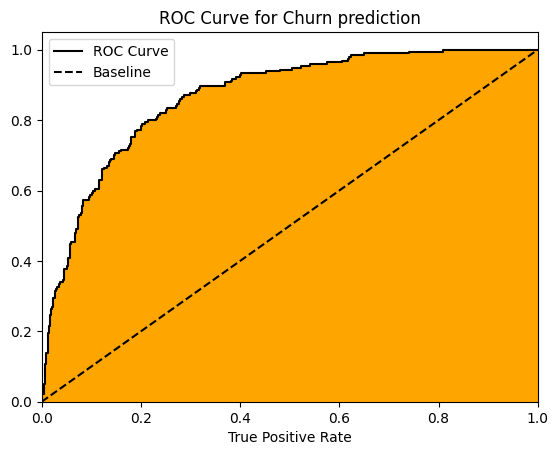

In [132]:
### Accuracy and Precision both are pretty good
fpr, tpr, thresholds = roc_curve(y_test.to_numpy(), preds)
plt.plot(fpr, tpr, 'k', label="ROC Curve")
plt.xlim(0, 1)
plt.ylim(0, 1.05)
plt.plot([0, 1], [0, 1], 'k--', label="Baseline")
plt.fill_between(fpr, 0, tpr, color='orange')
plt.xlabel("False Positive Rate")
plt.xlabel("True Positive Rate")
plt.title("ROC Curve for Churn prediction")
plt.legend()
plt.show()